In [14]:
import os
from PIL import Image, ImageOps
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [15]:
!pip install pillow

In [16]:
dataset_path = './human_vs_horses/train/'
image_data = []
labels = []

In [17]:
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name) #  el path de la imagen
            img = Image.open(image_path).convert('L') # se convierte la imagen a escala de grises
            img_data = np.array(img).flatten() # aplastamos la imagen en un vector fila
            image_data.append(img_data) # agregamos las filas
            labels.append(label) # agregamos las etiquetas

In [18]:
image_data[0]

array([ 37,  39,  41, ..., 102,  90,  86], dtype=uint8)

In [19]:
Y_train = np.array(labels)
X_train = np.array(image_data)

#modelo = GaussianNB()
modelo = KNeighborsClassifier()

modelo.fit(X_train, Y_train)

KNeighborsClassifier()

In [20]:
dataset_path = './human_vs_horses/test/'
image_data = []
labels = []

In [21]:
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name) #  el path de la imagen
            img = Image.open(image_path).convert('L') # se convierte la imagen a escala de grises
            img_data = np.array(img).flatten() # aplastamos la imagen en un vector fila
            image_data.append(img_data) # agregamos las filas
            labels.append(label) # agregamos las etiquetas

In [22]:
Y_test = np.array(labels)
X_test = np.array(image_data)

Y_pred = modelo.predict(X_test)

In [23]:
accuracy_score(Y_test, Y_pred)

0.75

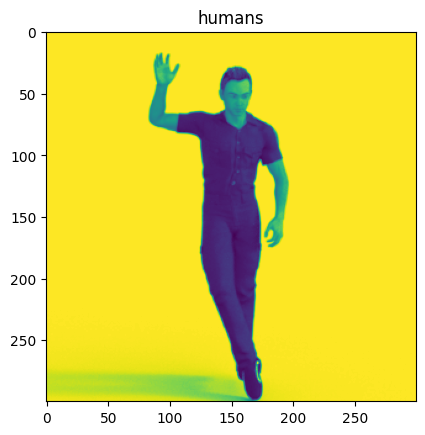

In [24]:
img_data = X_test[100]

img = img_data.reshape(300, 300)

plt.title(Y_pred[100])
plt.imshow(img)
plt.show()